In [10]:
import yfinance as yf
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
import matplotlib.pyplot as plt

In [12]:
def get_gold_prices(ticker, start_date, end_date):
    gold_data = yf.download(ticker, start=start_date, end=end_date)
    return gold_data

def data_transform(df):
    monthly_mean = df.resample('M').mean()
    return monthly_mean

def holt_winters_forecast(train_data, test_data, seasonal_periods=12):
    # Преобразование данных в формат Pandas Series
    train_series = train_data['Close']

    # Создание модели Хольта-Уинтерса
    model = ExponentialSmoothing(
        train_series,
        trend='add',  # Добавляемый тренд
        seasonal='add',  # Аддитивная сезонность
        seasonal_periods=seasonal_periods  # Длина сезона
    )

    # Подгонка модели к данным
    fit_model = model.fit()

    # Прогнозирование на один шаг вперед
    forecast = fit_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    return fit_model.params, forecast

In [14]:
ticker = 'GLD'
start_date = '2017-01-01'
end_date = '2023-12-31'
gold_prices = get_gold_prices(ticker, start_date, end_date)

# Преобразование данных в ежемесячные средние значения
monthly_gold_prices = data_transform(gold_prices)

# Разделение данных на обучающую и тестовую выборки
num_years = 6
num_months_per_year = 12
total_observations = num_years * num_months_per_year

train_data = monthly_gold_prices.iloc[:total_observations]
test_data = monthly_gold_prices.iloc[total_observations:total_observations + num_months_per_year]

params, forecast = holt_winters_forecast(train_data, test_data, seasonal_periods=num_months_per_year)

[*********************100%***********************]  1 of 1 completed
/var/folders/h6/hfqnp7r94vqbm41rxyx338sm0000gp/T/ipykernel_8508/616006041.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M').mean()


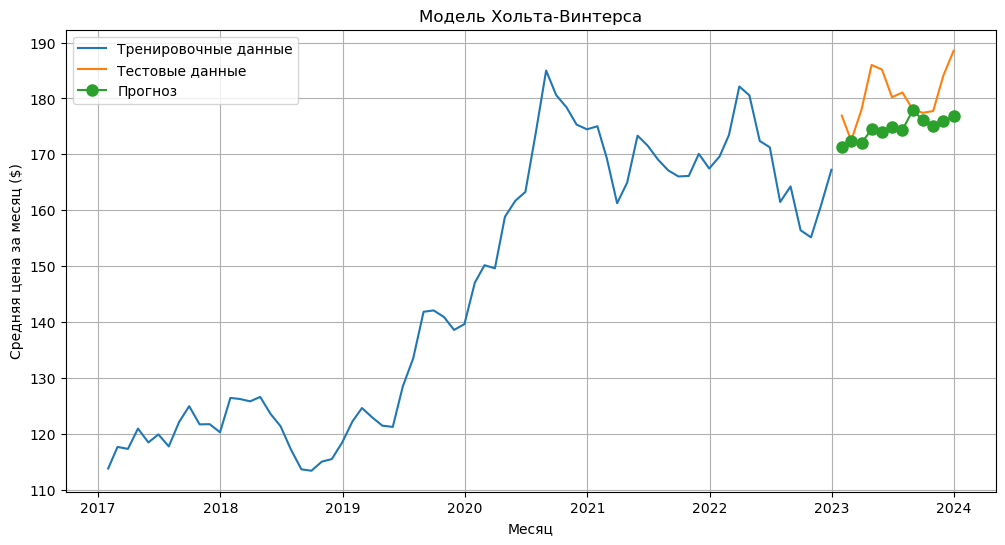

Parameters of the model: {'smoothing_level': 0.9999999850988388, 'smoothing_trend': 0.0, 'smoothing_seasonal': 9.054265120696562e-11, 'damping_trend': nan, 'initial_level': 112.65605831657504, 'initial_trend': 0.7983741630634474, 'initial_seasons': array([ 0.31031253,  0.73296316, -0.47590547,  1.11211999, -0.13036027,
       -0.0680524 , -1.37555388,  1.36171438, -1.18895836, -3.01822798,
       -3.01958246, -2.90575922]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [16]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label="Тренировочные данные")
plt.plot(test_data.index, test_data['Close'], label="Тестовые данные")
plt.plot(forecast.index, forecast, marker='o', markersize=8, label="Прогноз")
plt.title("Модель Хольта-Винтерса")
plt.xlabel("Месяц")
plt.ylabel("Средняя цена за месяц ($)")
plt.legend()
plt.grid(True)
plt.show()

print("Parameters of the model:", params)